In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

This is a coding along *7. Aggregations: min, max, and Everything in Between*.

## Creating a generator

In [2]:
rng = np.random.default_rng(seed=1701)

### Why should we use a custom random generator?

It turns out that there's a significant difference between 2 approaches to random number generating in Python. Below is the answer by ChatGPT. The main idea is that the first approach is for quick scripting, the second is much more flexible and reproducible. 

In particular we may set `seed` in the first approach, but it's not recommended (from documentation):
> `numpy.random.seed()`. This is a convenience, legacy function that exists to support older code that uses the singleton RandomState. Best practice is to use a dedicated Generator instance rather than the random variate generation methods exposed directly in the random module.

 
The two approaches to generating random numbers or arrays in NumPy serve different purposes and offer different advantages in terms of flexibility, reproducibility, and performance. Let's explore the differences between using `np.random.randint()` (or similar functions) and creating a generator with `np.random.default_rng()` and then calling methods like `rng.integers()`.

####`np.random` module functions (e.g., `np.random.randint`)

1. **Ease of Use**: Functions like `np.random.randint()` are straightforward and simple to use for generating random numbers. They are ideal for quick tasks and scripting where simplicity is a priority.

2. **Global State**: These functions rely on a global random number generator (RNG) state. This means that every call to a random function affects the global state. This can be convenient but also problematic for reproducibility and debugging in more complex programs.

3. **Legacy API**: This approach is part of the legacy API of NumPy's random number generation, which has been used for many years. While it is still widely used, there are some limitations and less flexibility compared to the newer approach.

#### `np.random.default_rng()` and Generator methods (e.g., `rng.integers()`)

1. **Flexibility and Control**: By creating a generator with `np.random.default_rng()`, you gain an instance of the `Generator` class. This instance can be used to generate random numbers in a controlled manner, independent of other random number generation in your program. This is particularly useful for parallel computing or when you need multiple independent streams of random numbers.

2. **Reproducibility**: Since each generator instance has its own state, it is easier to manage reproducibility. You can create a generator with a specific seed and be assured that the random numbers generated by this instance will be the same every time, without interference from other random number generation elsewhere in your program.

3. **Performance**: The new `Generator` class can offer better performance and more features. It is built on the PCG64 bit generator, which is an improvement over the Mersenne Twister used in the legacy API in terms of performance and statistical properties.

4. **Future-proofing**: The `Generator` class and the new random generation methods are the recommended approach going forward. The legacy API will still be available, but the newer API is where future improvements and new features will be focused.

#### Example Comparison

##### Using `np.random.randint()`
```python
import numpy as np

# Generate random integers using the legacy approach
random_numbers = np.random.randint(0, 10, size=5)
print(random_numbers)
```

##### Using `np.random.default_rng()`
```python
import numpy as np

# Create a generator instance
rng = np.random.default_rng()

# Generate random integers using the new approach
random_numbers = rng.integers(0, 10, size=5)
print(random_numbers)
```

In summary, while `np.random.randint()` and other similar functions are simple and easy to use, creating a generator with `np.random.default_rng()` and using its methods like `rng.integers()` provides greater flexibility, control, and is recommended for new code due to better performance and reproducibility.

## Aggregations

### Summing the Values in an Array

In [3]:
# Return uniform random floats in the half-open interval [0.0, 1.0).
L = rng.random(100)

In [4]:
L.shape, L.size, L[:3]

((100,), 100, array([0.4020733 , 0.30563311, 0.67668051]))

In [5]:
np.sum(L)

np.float64(47.13890796604283)

> ... because it executes the operation in compiled code, NumPy’s version of the operation is computed much more quickly. Be (also) careful ...: the sum function and the np.sum function are not identical, which can sometimes lead to confusion!

In [6]:
big_array = rng.random(1000000) 
%timeit sum(big_array)
%timeit np.sum(big_array)

35.1 ms ± 1.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
124 μs ± 527 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Minimum and Maximum

In [7]:
np.min(big_array), np.max(big_array)

(np.float64(1.738670563078415e-06), np.float64(0.9999980069594879))

> For min, max, sum, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself.

In [8]:
big_array.min(), big_array.max()

(np.float64(1.738670563078415e-06), np.float64(0.9999980069594879))

In [9]:
np.sum(big_array), big_array.sum()

(np.float64(499889.45325896033), np.float64(499889.45325896033))

### Multidimensional Aggregates

In [10]:
# Return random integers from low (inclusive) to high (exclusive), 
# or if endpoint=True, low (inclusive) to high (inclusive).
rng = np.random.default_rng(seed=1701)
M = rng.integers(low=0, high=10, size=(3, 4))

In [11]:
M

array([[9, 4, 0, 3],
       [8, 6, 3, 1],
       [3, 7, 4, 0]])

In [12]:
np.sum(M)

np.int64(48)

Very important observation:
> The way the axis is specified here can be confusing to users coming from other lan‐ guages. The axis keyword specifies the dimension of the array that will be collapsed, rather than the dimension that will be returned. 

In [13]:
# sum over columns (collapsing axis=0)
np.sum(M, axis=0)

array([20, 17,  7,  4])

In [14]:
# sum over rows (collapsing axis=1)
np.sum(M, axis=1)

array([16, 18, 14])

In [15]:
np.max(M, axis=0), np.max(M, axis=1)

(array([9, 7, 4, 3]), array([9, 8, 7]))

## What Is the Average Height of US Presidents?

### Getting the data

In [16]:
!head -4 president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [17]:
data = pd.read_csv('president_heights.csv')

In [18]:
data.head(4)

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163


In [19]:
heights = np.array(data['height(cm)'])

In [20]:
heights.size, heights.shape

(44, (44,))

In [21]:
heights[:4]

array([189, 170, 189, 163])

### Summary Statistics

In [22]:
np.mean(heights), np.std(heights), np.min(heights), np.max(heights)

(np.float64(180.04545454545453),
 np.float64(6.983599441335736),
 np.int64(163),
 np.int64(193))

In [23]:
np.percentile(heights, 25), np.median(heights), np.percentile(heights, 75)

(np.float64(174.75), np.float64(182.0), np.float64(183.5))

### Plotting the data

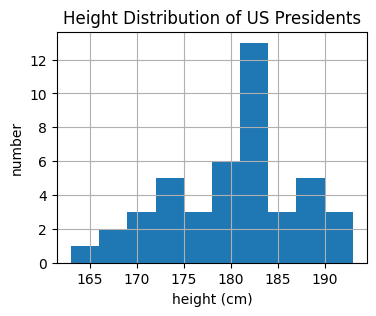

In [24]:
plt.figure(figsize=(4, 3))
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');
plt.grid();